In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [2]:
senti_data = pd.read_csv("sentimentdata.csv", encoding="latin-1")
senti_data.head(100)

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
95,10149,: I wish school was like those revision sessio...,0
96,10509,Nothin' like a good book and some spring clean...,0
97,10566,"@kerryn8 Thanks, appreciate your feedback",0
98,10611,i'm listening MUSIC,0


In [3]:
senti_data.columns[senti_data.isna().any()]

Index([], dtype='object')

In [4]:
senti_data =senti_data[['message to examine','label (depression result)']]
senti_data

,message to examine,label (depression result)
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [9]:
# Change columns name and change target values

senti_data.rename(columns = {'label (depression result)': 'target', 
                            'message to examine': 'message'}, 
                inplace = True)

senti_data.head()

,message,target
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [11]:
# Split data into training and testing sets 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(senti_data.message, senti_data.target,test_size=0.3, random_state=0)

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 
senti_data['target'] = label_encoder.fit_transform(senti_data['target'])

In [17]:
# Initialise Count Vectorizer

In [18]:
vectorizer = CountVectorizer(ngram_range=(1, 2)).fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [20]:
senti_data.head()

,message,target
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [22]:
print(senti_data.iloc[8566]['message'])

in a foursome with anxiety, stress and depression


In [24]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

1. Logistic Regression model

In [28]:
# 1. Train the model
lr_model = LogisticRegression()

lr_model.fit(X_train_vectorized, Y_train) 
# 2. Make prediction 
y_lr_model_predict = lr_model.predict(X_test_vectorized)

In [30]:
# 3. Evaluate the model
print('Logistic Regression:')
print('Accuracy:', accuracy_score(Y_test, y_lr_model_predict)) 
print('Precision:', precision_score(Y_test, y_lr_model_predict)) 
print('Recall:', recall_score(Y_test, y_lr_model_predict)) 
print('F1 score:', f1_score(Y_test, y_lr_model_predict))

Logistic Regression:
Accuracy: 0.9974151857835218
Precision: 1.0
Recall: 0.9885386819484241
F1 score: 0.9942363112391931


2.LINEAR SVM MODEL

In [33]:
svm_model = LinearSVC() 
svm_model.fit(X_train_vectorized, Y_train) 
y_svm_model_predict = svm_model.predict(X_test_vectorized)

In [35]:
# Evaluate the model
print('\nSVM:') 
print('Accuracy:', accuracy_score(Y_test, y_svm_model_predict)) 
print('Precision:', precision_score(Y_test, y_svm_model_predict)) 
print('Recall:', recall_score(Y_test, y_svm_model_predict)) 
print('F1 score:', f1_score(Y_test, y_svm_model_predict))


SVM:
Accuracy: 0.9974151857835218
Precision: 1.0
Recall: 0.9885386819484241
F1 score: 0.9942363112391931


3. ADABOOST CLASSIFIER

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [40]:
adaboost = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.3,random_state = 1)    #n_estimators: no of weak learners that we assign (here its 50).
adaboost.fit(X_train_vectorized,Y_train)
y_pred = adaboost.predict(X_test_vectorized)

In [41]:
print('\nAdaboost:') 
print('Accuracy:', adaboost.score(X_train_vectorized,Y_train))
print('Precision:', precision_score(Y_test,y_pred)) 
print('Recall:', recall_score(Y_test, y_pred)) 
print('F1 score:', f1_score(Y_test, y_pred))


Adaboost:
Accuracy: 0.999861476658817
Precision: 0.9985569985569985
Recall: 0.9914040114613181
F1 score: 0.9949676491732566


CONCLUSION

ADABOOST CLASSIFIER GIVES THE BEST ACCURACY COMPARED TO LOGISTIC REGRESSION AND SUPPORT VECTOR CLASSIFIER

In [45]:
cm=confusion_matrix(Y_test,y_pred)

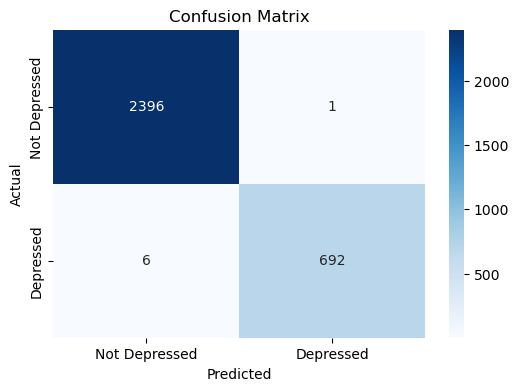

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Depressed','Depressed'], yticklabels=['Not Depressed','Depressed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SAVE THE FILE IN PICKLE

In [50]:
import joblib

In [52]:
import pickle
import os

model_file_name = "adaboost_best_model.pkl"
model_folder = "./models/"

# Create the directory if it doesn't exist
os.makedirs(model_folder, exist_ok=True)

# Save the model using pickle
with open(os.path.join(model_folder, model_file_name), 'wb') as file:
    pickle.dump(adaboost, file)

In [54]:
# 2. Load the model
# Load the model using pickle
with open(os.path.join(model_folder, model_file_name), 'rb') as file:
    loaded_ada_model = pickle.load(file)

In [56]:
vectorizer_file_name = "count_vectorizer_.pkl"

with open(os.path.join(model_folder, vectorizer_file_name), 'wb') as file:
    pickle.dump(vectorizer, file)

In [58]:
# Load the vectorizer
with open(os.path.join(model_folder, vectorizer_file_name), 'rb') as file:
    cv = pickle.load(file)


In [60]:
def make_prediction(input_text):
    # Transform the input text
    preprocessed_text = cv.transform([input_text])

    # Make prediction using the loaded SVM model
    prediction = loaded_ada_model.predict(preprocessed_text)

    info = '' 
    if prediction[0] == 0:
        info = "Not Depressed"
    else:
        info = "Depressed"
    
    final_info = "This person is - {}".format(info)
    
    return final_info

# Example text for prediction
text_example = " Depression  https://twitter.com/cyn_santana/st..."
print(make_prediction(text_example))

This person is - Depressed


In [62]:
print(senti_data.iloc[9292]['target'])

1
